In [87]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
class palbo_RNAseq:
    def __init__(self, fpath):
        self._raw_data = pd.read_table(fpath)
        self.gene_summary = self._raw_data[abs(self._raw_data['log2FoldChange']) >= 0.58][['GeneName', 'log2FoldChange', 'padj']]

    def plot_volcano(self):
        """Create volcano plot"""
        plt.figure(figsize=(10, 8))
        plt.scatter(self.gene_summary['log2FoldChange'], -np.log10(self.gene_summary['padj']), 
                alpha=0.6)
        plt.xlabel('Log Fold Change')
        plt.ylabel('-log10(adjusted P-value)')
        plt.show()

In [90]:
palbo_seq = palbo_RNAseq("./input_data/palbo_RNAseq/palbociclib_gene_list.txt")

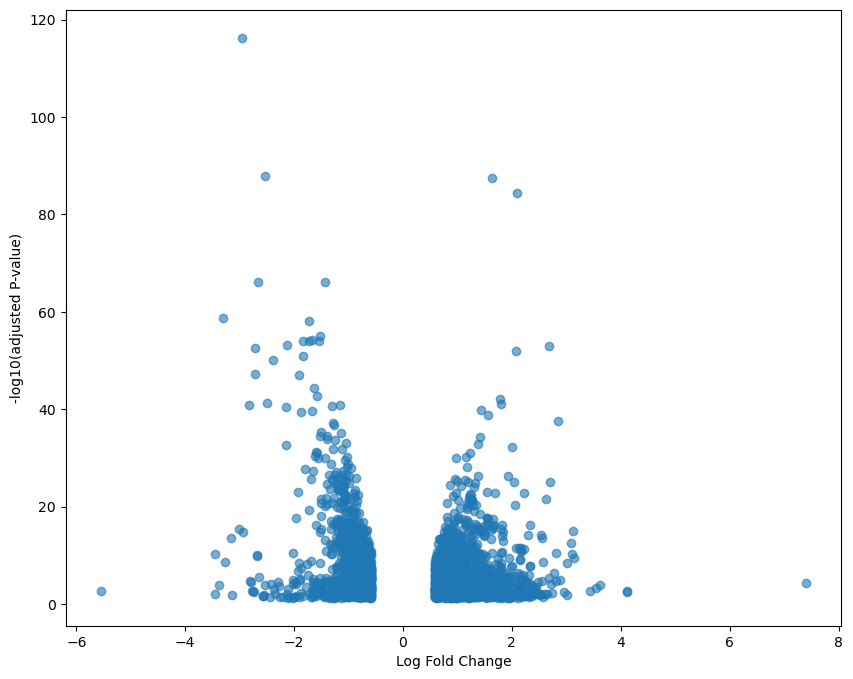

In [92]:
palbo_seq.plot_volcano()

In [82]:
class palbo_signatures:
    def __init__(self, cdk6_fpath, rb1_fpath):
    # check funtion for correct corresponding data
        self.CDK6 = pd.read_csv(cdk6_fpath)
        self.RB1 = pd.read_csv(rb1_fpath)
        self.mutation_status()
    
    def mutation_status(self, pattern=r"^.*Mutation$"):
        """add mutation status"""
        self.CDK6['mutation'] = self.CDK6['Partner'].str.match(pattern)
        self.RB1['mutation'] = self.RB1['Partner'].str.match(pattern)

    def _plot_scatter(self, data, title):
        """Create volcano plot"""
        plt.figure(figsize=(10, 8))
        plt.scatter(data['t_value'], -np.log10(data['p_value']), 
                c=data['mutation'].map({True: 'red', False: 'blue'}),
                alpha=0.6)
        plt.xlabel('t-value')
        plt.ylabel('-log10(p-value)')
        plt.title(title)
        plt.show()
    
    def plot_volcano(self, target):
        if target == "CDK6":
            self._plot_scatter(self.CDK6, "Palbociclib signatures when CDK6 as primary target")
        elif target == "RB1":
            self._plot_scatter(self.RB1, "Palbociclib signatures when RB1 as primary target")
        else:
            raise ValueError("The target must be either CDK6 or RB1")

    def cross_heatmap(self):
        """Generate heatmap between two signature datasets"""        
        # merge two datasets
        cross_data = pd.merge(self.CDK6, self.RB1, on='Partner', how='inner',
                              suffixes=('_CDK6', 'RB1'))
        
        # Correlation matrix
        # cor_matrix = cross_data[col2draw].corr()
        col2draw = cross_data.columns.str.match("t_value_*")
        # data heatmaps
        plt.figure(figsize=(10, 8))
        sns.clustermap(cross_data.loc[:, col2draw], cmap='RdBu_r', row_cluster=True, col_cluster=False,
                    center=0, cbar_kws={'label': 'CDK6 | RB1'})
        plt.title('T score heatmap')
        
        plt.tight_layout()
        return cross_data

In [83]:
fpath1="./input_data//palbo_signature/CCLE_palbo_CDK6.csv"
fpath2="./input_data/palbo_signature/CCLE_palbo_RB1.csv" 
palbo_sig = palbo_signatures(fpath1, fpath2)

In [74]:
cross_data = pd.merge(palbo_sig.CDK6, palbo_sig.RB1, on='Partner', how='inner', 
                      suffixes=('_CDK6', 'RB1'))

,Partner,t_value_CDK6,p_value_CDK6,mutation_CDK6,t_valueRB1,p_valueRB1,mutationRB1
0,UEVLD,-3.53105,0.000460,False,-3.48499,0.000544,False
1,FBXW7,4.90837,0.000001,False,3.89124,0.000116,False
2,MRPL30,3.49290,0.000529,False,4.45457,0.000011,False
3,CD53,4.23140,0.000029,False,4.74901,0.000003,False
4,MYO1C,-4.23622,0.000028,False,-3.17019,0.001636,False
...,...,...,...,...,...,...,...
2498,RAPGEF3,-2.99689,0.002890,False,-3.25121,0.001242,False
2499,TMTC3,-3.70673,0.000238,False,-4.05113,0.000061,False
2500,MSL2,4.24827,0.000027,False,4.31125,0.000020,False
2501,SEMA7A,-3.40611,0.000723,False,-2.59804,0.009708,False


<Figure size 1000x800 with 0 Axes>

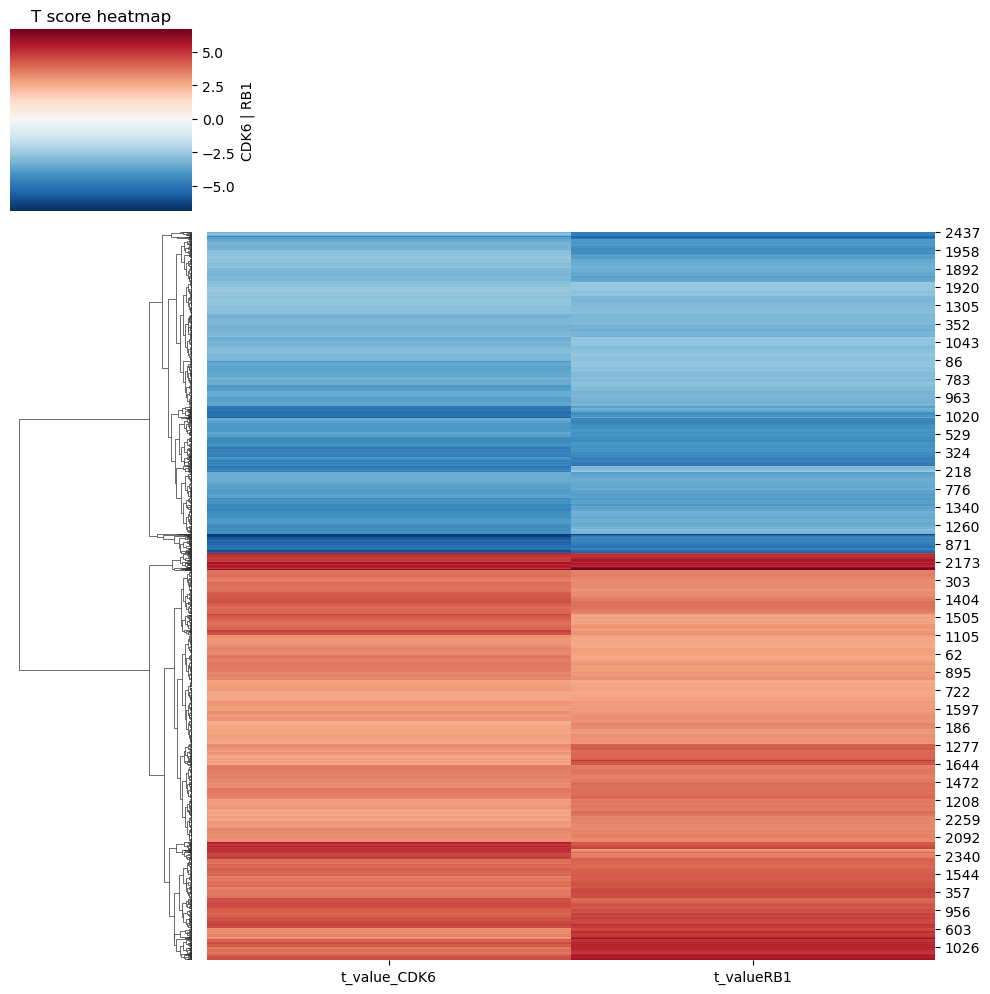

In [84]:
palbo_sig.cross_heatmap()

In [68]:
cross_data.loc[:,cross_data.columns.str.match("t_value_*")]

,t_value_CDK6,t_valueRB1
0,-3.53105,-3.48499
1,4.90837,3.89124
2,3.49290,4.45457
3,4.23140,4.74901
4,-4.23622,-3.17019
...,...,...
2498,-2.99689,-3.25121
2499,-3.70673,-4.05113
2500,4.24827,4.31125
2501,-3.40611,-2.59804


In [5]:
def read_and_process_data():
    # CARE data input
    ccle_cdk6 = pd.read_csv("./input_data//palbo_signature/CCLE_palbo_CDK6.csv")
    ccle_rb1 = pd.read_csv("./input_data/palbo_signature/CCLE_palbo_RB1.csv")
    
    # RNA-Seq data input
    palbo_seq_raw = pd.read_table("./input_data/palbo_RNAseq/palbociclib_gene_list.txt", sep='\t')

    # CRISPR screen data
    # crispr_gene_summary = pd.read_csv('./control_normalized_working/palbo_vs_dmso_control_normalized.gene_summary.txt')
    
    # Filter sequencing data by fold change
    palbo_seq_select = palbo_seq_raw[abs(palbo_seq_raw['log2FoldChange']) >= 0.58][['GeneName', 'log2FoldChange', 'padj']]

    return ccle_cdk6, ccle_rb1, palbo_seq_select

In [6]:
ccle_cdk6, ccle_rb1, palbo_seq_select = read_and_process_data()

In [15]:
def mutation_status(data, pattern=r"^.*Mutation$"):
    """Add mutation status column"""
    data['mutation'] = data['Partner'].str.match(pattern)
    return data

In [16]:
ccle_cdk6_mut = mutation_status(ccle_cdk6)

In [19]:
def plot_volcano(data, title):
    """Create volcano plot"""
    plt.figure(figsize=(10, 8))
    plt.scatter(data['t_value'], -np.log10(data['p_value']), 
               c=data['mutation'].map({True: 'red', False: 'blue'}),
               alpha=0.6)
    plt.xlabel('t-value')
    plt.ylabel('-log10(p-value)')
    plt.title(title)
    plt.show()

In [ ]:
def cross_heatmap(df1, df2, col2draw=None):
    """Generate correlation heatmap between two datasets"""
    if col2draw is None:
        col2draw = ['t_value', 'log2FoldChange']
    
    cross_data = pd.merge(df1, df2, left_on='Partner', right_on='GeneName', how='inner')
    
    # Correlation matrix
    cor_matrix = cross_data[col2draw].corr()
    
    # Plot heatmaps
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
    
    # Correlation heatmap
    sns.heatmap(cor_matrix, ax=ax1, cmap='RdBu_r', vmin=-1, vmax=1, 
                annot=True, square=True)
    ax1.set_title('Correlation Matrix')
    
    # Data heatmap
    sns.heatmap(cross_data[col2draw], ax=ax2, cmap='RdBu_r',
                center=0, cbar_kws={'label': 't-score | lfc'})
    ax2.set_title('Data Values')
    
    plt.tight_layout()
    return cross_data

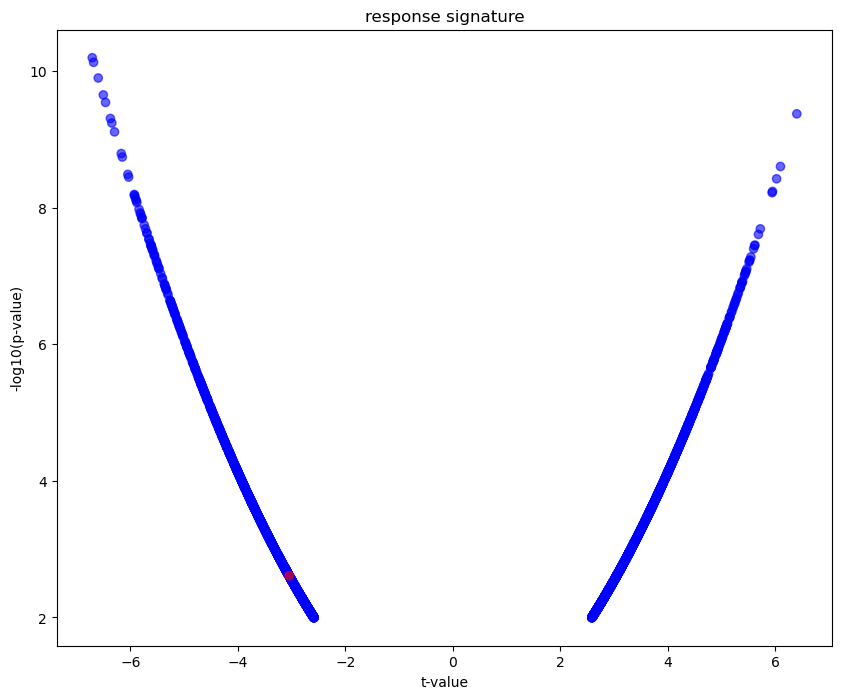

In [18]:
plot_volcano(ccle_cdk6_mut, "response signature")

In [14]:
palbo_seq_select = palbo_seq[abs(palbo_seq['log2FoldChange']) >= 0.58][['GeneName', 'log2FoldChange', 'padj']]

In [17]:
read_and_process_data()

(            Partner  t_value   p_value
 0             KLF15  2.81931  0.005042
 1             UEVLD -3.53105  0.000460
 2             FBXW7  4.90837  0.000001
 3            MRPL30  3.49290  0.000529
 4            TRIM27  3.72346  0.000224
 ...             ...      ...       ...
 3679          TMTC3 -3.70673  0.000238
 3680           MSL2  4.24827  0.000027
 3681         SEMA7A -3.40611  0.000723
 3682           BOD1 -4.57292  0.000006
 3683  EDN1_Mutation -3.04700  0.002458
 
 [3684 rows x 3 columns],
                     Partner  t_value   p_value
 0                    IL27RA  2.60359  0.009554
 1                     UEVLD -3.48499  0.000544
 2                     FBXW7  3.89124  0.000116
 3                    MRPL30  4.45457  0.000011
 4                     DNAL1 -2.78735  0.005557
 ...                     ...      ...       ...
 3745                   BOD1 -4.28696  0.000023
 3746       FGFR1OP_Mutation -3.03748  0.002535
 3747        NFATC1_Mutation -2.70695  0.007069
 3748       

In [4]:
ccle_rb1.head()

,Partner,t_value,p_value
0,IL27RA,2.60359,0.009554
1,UEVLD,-3.48499,0.000544
2,FBXW7,3.89124,0.000116
3,MRPL30,4.45457,0.000011
4,DNAL1,-2.78735,0.005557


In [8]:
palbo_seq.head()

,GeneName,GeneID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,FGF21,ENSG00000105550,18.285821,-5.543666,1.595621,-3.474300,5.121880e-04,2.363393e-03
1,FUT1,ENSG00000174951,80.085898,-3.458054,0.493054,-7.013541,2.320000e-12,6.540000e-11
2,ABBA01000935.2,ENSG00000283544,12.119077,-3.449173,1.143692,-3.015824,2.562822e-03,9.510224e-03
3,AL354872.2,ENSG00000271992,19.163350,-3.385983,0.786651,-4.304301,1.680000e-05,1.185490e-04
4,PMAIP1,ENSG00000141682,445.556485,-3.312410,0.198153,-16.716462,9.950000e-63,2.210000e-59


In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from palbociclib_signature_analysis import palbo_signatures
from palbo_RNAseq_analysis import palbo_RNAseq

In [142]:
def build_library(fpath="./input_data/Enrichment/MSigDB_Hallmark_2020.txt"):
    """Build enrichment library for different gene sets"""
    with open(fpath, 'r') as f:
        lines = f.readlines()
    library = {}
    for line in lines:
        parts = line.strip().split('\t')
        new_parts = []
        for part in parts:
            if part != '':
                new_parts.append(part)
        library[new_parts[0]] = new_parts[1:]
    return library
geneset_library = build_library()


KeyError: 1

In [124]:
fpath="./input_data/Enrichment/MSigDB_Hallmark_2020.txt"

with open(fpath, 'r') as f:
        lines = f.readlines()
    
library = {}
for line in lines:
    parts = line.strip().split('\t')
    new_parts = []
    for part in parts:
         if part != '':
               new_parts.append(part)
    library[new_parts[0]] = new_parts[1:] 

In [127]:
fpath="./input_data/Enrichment/MSigDB_Hallmark_2020.txt"

with open(fpath, 'r') as f:
        lines = f.readlines()
    
library = {}
for line in lines:
    parts = line.strip().split('\t')

    library[parts[0]] = parts[1:]

In [128]:
library

{'TNF-alpha Signaling via NF-kB': ['',
  'MARCKS',
  'IL23A',
  'NINJ1',
  'TNFSF9',
  'SIK1',
  'ATF3',
  'SERPINE1',
  'MYC',
  'HES1',
  'CCNL1',
  'CCN1',
  'EGR1',
  'EGR2',
  'JAG1',
  'EGR3',
  'ABCA1',
  'GADD45B',
  'GADD45A',
  'PLK2',
  'KLF10',
  'EIF1',
  'EHD1',
  'FOSL2',
  'FOSL1',
  'GPR183',
  'PLPP3',
  'IFIT2',
  'ICAM1',
  'ZC3H12A',
  'IER2',
  'IL12B',
  'JUNB',
  'IER5',
  'IER3',
  'STAT5A',
  'DUSP5',
  'EDN1',
  'JUN',
  'DUSP4',
  'DUSP1',
  'DUSP2',
  'TSC22D1',
  'CCL20',
  'SPHK1',
  'LIF',
  'IL18',
  'TUBB2A',
  'RHOB',
  'VEGFA',
  'PTPRE',
  'IL1A',
  'TLR2',
  'IL1B',
  'BHLHE40',
  'ID2',
  'CLCF1',
  'REL',
  'FJX1',
  'SGK1',
  'BTG3',
  'BTG2',
  'BTG1',
  'SDC4',
  'LITAF',
  'AREG',
  'SOCS3',
  'PANX1',
  'RIPK2',
  'NFIL3',
  'SERPINB2',
  'GCH1',
  'IFNGR2',
  'G0S2',
  'FOS',
  'SERPINB8',
  'F3',
  'SPSB1',
  'FOSB',
  'PER1',
  'F2RL1',
  'HBEGF',
  'CD44',
  'TRIP10',
  'CDKN1A',
  'PTGER4',
  'PTGS2',
  'IFIH1',
  'NAMPT',
  'OLR1',
  '